# Vaje 1: Podatki in preprosti napovedni modeli

Preberi podatke iz datoteke 'vaje1a_train.csv' s pomočjo knjižnjice pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns # Plots for pandas dataframes
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dfTrain1 = pd.read_csv('vaje1a_train.csv')
dfTrain1

,Height,Weight,Sex
0,1.822293,57.729028,Male
1,1.782341,112.787042,Male
2,1.836338,87.666535,Male
3,1.634066,58.728574,Male
4,1.719421,85.021465,Male
...,...,...,...
995,1.647670,85.258482,Female
996,1.669433,99.723768,Female
997,1.666184,89.416837,Female
998,1.578847,99.308592,Female


Vizualiziraj podatke s pomočjo knjižnjic matplotlib in seaborn

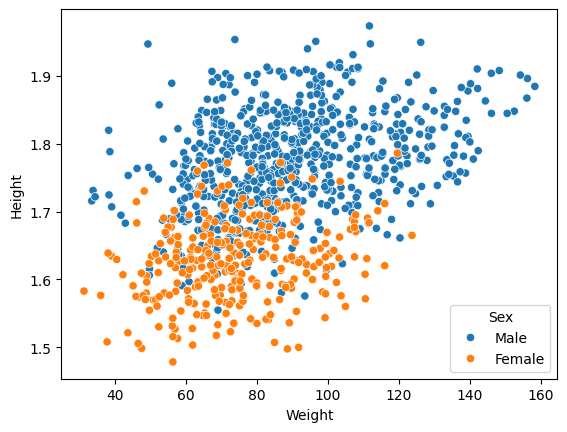

In [3]:
sns.scatterplot(dfTrain1, x='Weight', y='Height', hue='Sex')
plt.show()

Loči podatke na napovedne spremenljivko (x) in ciljno spremenljivko (y) ter jih pretvori v numpy array

In [ ]:
xTrain = dfTrain1[dfTrain1.columns.drop(['Sex'])]
xTrain = xTrain.to_numpy() # Convert to numpy array

yTrain = dfTrain1['Sex'].astype('category')
yTrain = yTrain.to_numpy()

Preberi testne podatke, ter jih pretvori v numpy array

In [ ]:
dfTest1 = pd.read_csv('vaje1a_test.csv')

xTest = dfTest1[dfTest1.columns.drop(['Sex'])]
xTest = xTest.to_numpy()

yTest = dfTest1['Sex'].astype('category')
yTest = yTest.to_numpy()

## Napovedovanje diskretne spremenljivke (klasifikacija)

Izmisli si nekaj preprostih napovednih modelov in preizkusi njihovo točnost (accuracy) na učnih in testnih podatkih

In [ ]:
def majorityClassifier(xTrain, yTrain, xTest): # Dumb exaple of a classifier that always predicts the majority class 
    unique, counts = np.unique(yTrain, return_counts=True)
    majority = unique[np.argmax(counts)]
    return np.full(xTest.shape[0], majority)

yPred = majorityClassifier(xTrain, yTrain, xTest)
print((yPred == yTest).sum() / yTest.shape[0])

In [ ]:
def clossestMean(xTrain, yTrain, xTest):
    # Normalize the data
    maxValues = np.max(xTrain, axis=0)
    xTrain = xTrain / maxValues
    xTest = xTest / maxValues

    unique = np.unique(yTrain)
    classMean = []
    for c in unique:
        isInClass = yTrain == c
        classInstances = xTrain[yTrain == c, :]
        classMean.append(np.mean(classInstances, axis=0))
    dist = np.zeros((xTest.shape[0], unique.shape[0]))
    for i in range(unique.shape[0]):
        dist[:, i] = np.mean(np.square(xTrain - classMean[i]), axis=1)
    
    minDistIdx = np.argmin(dist, axis=1)
    return np.array(unique[i] for i in minDistIdx)

Preizkusi točnost (accuracy) modela najbližnjih sosedov (nearest neighbour) za različne vrednosti parametra k (k=1, ..., 50)

In [15]:
nbrs = KNeighborsClassifier(n_neighbors=5).fit(xTrain, yTrain)
yPred = nbrs.predict(xTest)


1


Vizualiziraj točnost modela najbližjih sosedov za različne vrednosti parametra k

## Napovedovanje numeričnih spremenljivk (regresija)

Preberi učne in testne podatke

Vizualiziraj učne podatke

Izmisli si preprost napovedni model in preizkusi njihovo točnost na učnih in testnih podatkih

Preizkusi model najbližjih sosedov (nearest neighbour) za različne vrednosti parametra k (k=1, ..., 50)

Vizualiziraj točnost modela najbližjih sosedov za različne vrednosti parametra k